# PROYEK KLASIFIKASI GAMBAR

- **NAMA : DAVI SULAIMAN**
- **ID : MC189D5Y0317**
- **EMAIL : mc189d5y0317@student.devacademy.id**  

# 🍅 Klasifikasi Daun Tomat Menggunakan Deep Learning

Proyek ini bertujuan untuk membangun model deep learning yang mampu mengklasifikasikan kondisi daun tomat ke dalam empat kategori berdasarkan citra gambar. Tujuannya adalah membantu dalam deteksi dini penyakit tanaman dan meningkatkan praktik pertanian menggunakan klasifikasi gambar berbasis AI.

---

## 📌 Deskripsi Proyek

Model klasifikasi ini menggunakan **Convolutional Neural Network (CNN)** untuk mengklasifikasikan gambar daun tomat ke dalam **empat kelas utama** berikut:

- **Late_blight**
- **Septoria_leaf_spot**
- **Tomato_Yellow_Leaf_Curl_Virus**
- **Healthy**

Dataset yang digunakan merupakan subset dari dataset **PlantVillage** yang difokuskan hanya pada gambar daun tanaman tomat.

---

## 📁 Informasi Dataset

- **Sumber Dataset**: (https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset)
- **Total Gambar pada Dataset**: `54.305`
- **Total Gambar Daun Tomat**: `18.160`

Dataset ini berisi gambar daun dari berbagai jenis tanaman dengan berbagai jenis penyakit. Proyek ini hanya menggunakan gambar daun tomat.

---

## 🧠 Arsitektur Model

Model dikembangkan menggunakan **TensorFlow** dan **Keras**, dengan arsitektur **Sequential CNN** yang terdiri dari:

- `Conv2D`
- `MaxPooling2D`
- `Flatten`
- `Dense`
- `Dropout`

Model ini menggunakan fungsi loss `categorical_crossentropy` dan optimizer `Adam`. Akurasi tinggi berhasil dicapai pada data pelatihan dan validasi.

---

## ✅ Fitur Utama

- Menggunakan arsitektur CNN dengan model Sequential
- Menangani preprocessing gambar (resize dan normalisasi)
- Mendukung pembagian data menjadi training, validation, dan testing
- Menggunakan augmentasi data untuk generalisasi yang lebih baik
- Mendukung konversi model ke **TF Lite** dan **TFJS** untuk deployment
- Menyediakan antarmuka **inference interaktif** untuk upload gambar dan prediksi real-time

---

## 📦 Output Model

- Format `SavedModel`
- File `model.h5`
- File `converted_model.tflite` untuk perangkat mobile/edge
- Folder `tfjs_model/` untuk deployment web

---

## 🖼️ Kelas Keluaran (Output)

| Label Kelas                          | Deskripsi |
|-------------------------------------|-----------|
| `Late_blight`                       | Penyakit daun tomat yang umum disebabkan oleh *Phytophthora infestans* |
| `Septoria_leaf_spot`               | Penyakit jamur yang disebabkan oleh *Septoria lycopersici* |
| `Tomato_Yellow_Leaf_Curl_Virus`    | Infeksi virus yang menyebabkan daun menguning dan melengkung |
| `Healthy`                          | Daun dalam kondisi sehat tanpa tanda penyakit |


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Coding_Camp

/content/drive/MyDrive/Coding_Camp


## Install PIP yang digunakan

In [3]:
!pip install tensorflow tensorflowjs keras opendatasets pandas numpy matplotlib Pillow scipy scikit-learn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


## Import Library yang digunakan

In [4]:
# Standard libraries
import os
from collections import defaultdict

import random
import shutil
import pathlib
import zipfile

# Image processing
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Data processing
import pandas as pd
import numpy as np
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2

# External tools
import opendatasets as od


### Cek tensorflow yang digunakan

In [5]:
print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.18.0


## Data Preparation

In [6]:
od.download(
    'https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset'
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davisulaiman
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


In [7]:
base_dir = '/content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color'
os.listdir(base_dir)

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [8]:
def resize_images_in_directory(base_path, min_size=200, max_size=256):
    """
    Resize semua gambar dalam direktori ke ukuran acak antara min_size dan max_size.

    Args:
        base_path (str): Path ke direktori utama dataset.
        min_size (int): Ukuran minimum sisi gambar.
        max_size (int): Ukuran maksimum sisi gambar.
    """
    for root, _, files in os.walk(base_path):
        for filename in files:
            path = os.path.join(root, filename)
            try:
                with Image.open(path) as img:
                    new_size = (
                        random.randint(min_size, max_size),
                        random.randint(min_size, max_size)
                    )
                    resized = img.resize(new_size, Image.Resampling.LANCZOS)
                    resized.save(path)
            except Exception as err:
                print(f"Gagal memproses {path}: {err}")


def analyze_dataset(base_path, target_res=None):
    """
    Analisis jumlah gambar per kelas dan per resolusi.

    Args:
        base_path (str): Path ke dataset.
        target_res (str, optional): Resolusi target, misal "256x256".

    Returns:
        tuple: (jumlah_per_kelas, jumlah_per_resolusi)
    """
    class_counts = {}
    resolution_counts = {}

    for root, _, files in os.walk(base_path):
        if root == base_path:
            continue

        class_name = os.path.basename(root)
        class_counts[class_name] = len(files)

        for filename in files:
            path = os.path.join(root, filename)
            try:
                with Image.open(path) as img:
                    res = f"{img.width}x{img.height}"
                    resolution_counts[res] = resolution_counts.get(res, 0) + 1

                    if target_res and res == target_res:
                        resolution_counts['target'] = resolution_counts.get('target', 0) + 1
            except Exception as err:
                print(f"Error membaca {path}: {err}")

    return class_counts, resolution_counts


def display_analysis(class_counts, resolution_counts):
    """
    Tampilkan ringkasan jumlah gambar per kelas dan per resolusi.
    """
    print("\n Jumlah Gambar per Kelas:")
    for cls, count in class_counts.items():
        print(f"  {cls}: {count}")

    print("\n Jumlah Gambar per Resolusi:")
    for res, count in resolution_counts.items():
        label = "(target)" if res == 'target' else ""
        print(f"  {res}: {count} {label}")



In [9]:
dataset_path = '/content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color'
target_res = "256x256"

# Langkah 1: Resize semua gambar
resize_images_in_directory(dataset_path, min_size=200, max_size=256)

# Langkah 2: Analisis dataset setelah resize
class_counts, resolution_counts = analyze_dataset(dataset_path, target_res)

# Langkah 3: Tampilkan hasil analisis
display_analysis(class_counts, resolution_counts)


 Jumlah Gambar per Kelas:
  Apple___Apple_scab: 630
  Apple___Black_rot: 621
  Apple___Cedar_apple_rust: 275
  Apple___healthy: 1645
  Blueberry___healthy: 1502
  Cherry_(including_sour)___Powdery_mildew: 1052
  Cherry_(including_sour)___healthy: 854
  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513
  Corn_(maize)___Common_rust_: 1192
  Corn_(maize)___Northern_Leaf_Blight: 985
  Corn_(maize)___healthy: 1162
  Grape___Black_rot: 1180
  Grape___Esca_(Black_Measles): 1383
  Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076
  Grape___healthy: 423
  Orange___Haunglongbing_(Citrus_greening): 5507
  Peach___Bacterial_spot: 2297
  Peach___healthy: 360
  Pepper,_bell___Bacterial_spot: 997
  Pepper,_bell___healthy: 1478
  Potato___Early_blight: 1000
  Potato___Late_blight: 1000
  Potato___healthy: 152
  Raspberry___healthy: 371
  Soybean___healthy: 5090
  Squash___Powdery_mildew: 1835
  Strawberry___Leaf_scorch: 1109
  Strawberry___healthy: 456
  Tomato___Bacterial_spot: 2127
  Tomato___

In [10]:
def summarize_dataset_by_class(base_path, target="tomato"):
    """
    Menganalisis jumlah total gambar dan jumlah gambar untuk setiap subkelas dari target class.

    Args:
        base_path (str): Path ke direktori utama dataset.
        target (str): Nama kelas target yang ingin dianalisis.

    Returns:
        tuple: (jumlah_total_gambar, jumlah_gambar_target, dict_jumlah_per_subkelas)
    """
    total_images = 0
    target_images = 0
    subclass_distribution = {}

    for root, _, files in os.walk(base_path):
        image_count = len(files)
        total_images += image_count

        # Debugging: Tampilkan root yang sedang diproses
        print(f"Processing folder: {root}")

        # Cek apakah path folder mengandung nama kelas target (misalnya: tomato)
        if target.lower() in root.lower():
            target_images += image_count
            subclass = os.path.basename(root)
            subclass_distribution[subclass] = subclass_distribution.get(subclass, 0) + image_count

    return total_images, target_images, subclass_distribution

In [11]:
# Path ke dataset lokal
dataset_dir = '/content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color'
target_class = "tomato"

# Analisis dataset
total, target_total, subclass_counts = summarize_dataset_by_class(dataset_dir, target_class)

# Tampilkan ringkasan
print(f" Total gambar di dataset: {total}")
print(f" Total gambar untuk kelas '{target_class}': {target_total}")

print(f"\n Rincian jumlah gambar per subkelas dari '{target_class}':")
for subclass, count in subclass_counts.items():
    print(f"  - {subclass}: {count}")


Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color
Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab
Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Apple___Black_rot
Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Apple___Cedar_apple_rust
Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Apple___healthy
Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Blueberry___healthy
Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew
Processing folder: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Cherry_(including_sour)___healthy
Processing 

In [12]:
def extract_target_folders(source_dir, output_dir="dataset", keyword="tomato"):
    """
    Menyalin seluruh folder yang mengandung kata kunci tertentu dari source_dir ke output_dir.

    Args:
        source_dir (str): Direktori sumber utama.
        output_dir (str): Direktori tujuan untuk hasil salinan.
        keyword (str): Kata kunci yang dicari dalam nama folder (default: 'tomato').
    """
    os.makedirs(output_dir, exist_ok=True)

    for current_root, folders, _ in os.walk(source_dir):
        for folder in folders:
            if keyword.lower() in folder.lower():
                source_path = os.path.join(current_root, folder)
                target_path = os.path.join(output_dir, folder)

                if not os.path.exists(target_path):
                    shutil.copytree(source_path, target_path)
                    print(f" Disalin: {source_path} → {target_path}")
                else:
                    print(f" Dilewati (sudah ada): {target_path}")


def clean_folder_names(target_dir, strip_prefix="Tomato___"):
    """
    Menghapus awalan tertentu dari nama-nama folder di target_dir.

    Args:
        target_dir (str): Direktori yang mengandung folder-folder yang akan diganti namanya.
        strip_prefix (str): Prefiks yang akan dihapus dari nama folder.
    """
    for folder_name in os.listdir(target_dir):
        if folder_name.startswith(strip_prefix):
            old_path = os.path.join(target_dir, folder_name)
            new_name = folder_name[len(strip_prefix):]
            new_path = os.path.join(target_dir, new_name)

            os.rename(old_path, new_path)
            print(f" Diubah: {old_path} → {new_path}")


In [13]:
# Jalankan pipeline
if __name__ == "__main__":
    dataset_source = '/content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color'
    tomato_dataset_target = "/content/drive/MyDrive/Coding_Camp/main_dataset"

    # Step 1: Salin folder terkait 'tomato' dari dataset utama
    extract_target_folders(dataset_source, tomato_dataset_target, keyword="tomato")

    # Step 2: Rapikan nama folder dengan menghapus awalan 'Tomato___'
    clean_folder_names(tomato_dataset_target, strip_prefix="Tomato___")

 Disalin: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Tomato___Bacterial_spot → /content/drive/MyDrive/Coding_Camp/main_dataset/Tomato___Bacterial_spot
 Disalin: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Tomato___Early_blight → /content/drive/MyDrive/Coding_Camp/main_dataset/Tomato___Early_blight
 Disalin: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Tomato___Late_blight → /content/drive/MyDrive/Coding_Camp/main_dataset/Tomato___Late_blight
 Disalin: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Tomato___Leaf_Mold → /content/drive/MyDrive/Coding_Camp/main_dataset/Tomato___Leaf_Mold
 Disalin: /content/drive/MyDrive/Coding_Camp/plantvillage-dataset/plantvillage dataset/color/Tomato___Septoria_leaf_spot → /content/drive/MyDrive/Coding_Camp/main_dataset/Tomato___Septoria_leaf_spot
 Disalin: /content/drive/MyDrive/Coding_Camp/plantvillage

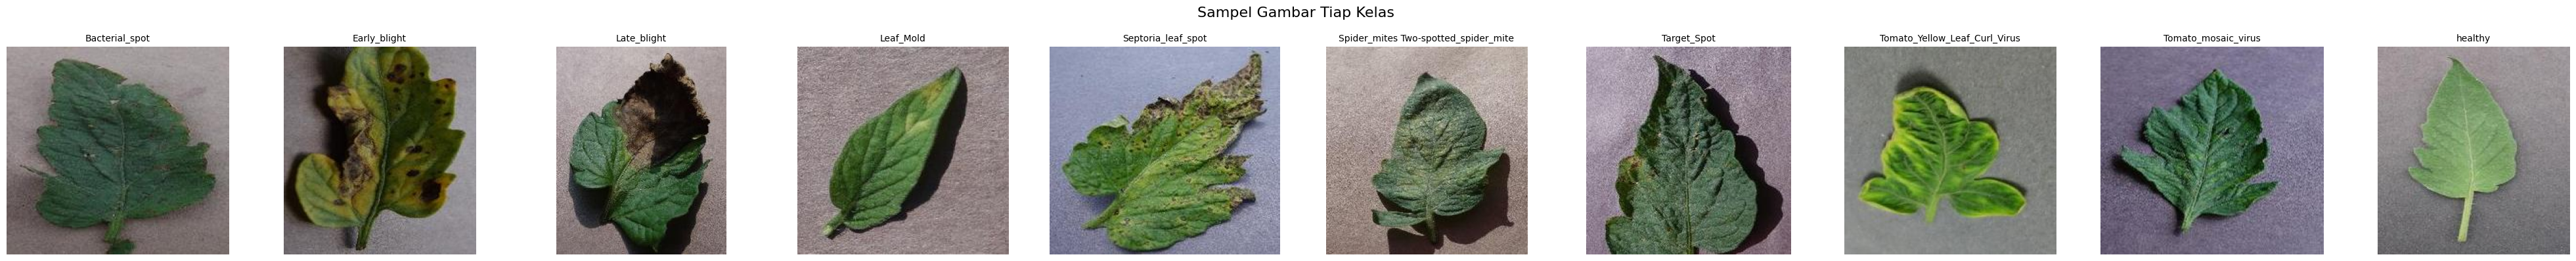

In [14]:
def show_example_image(dataset_path):
    """
    Menampilkan satu gambar per kelas dari dataset berdasarkan struktur folder.

    Args:
        dataset_path (str): Direktori utama dataset yang berisi folder per kelas.
    """
    gambar_kelas = {}

    # Telusuri setiap subfolder untuk mengambil satu gambar acak
    for folder_utama, _, daftar_berkas in os.walk(dataset_path):
        if daftar_berkas:
            nama_kelas = os.path.basename(folder_utama)
            contoh = random.choice(daftar_berkas)
            gambar_kelas[nama_kelas] = os.path.join(folder_utama, contoh)

    jumlah_kelas = len(gambar_kelas)
    ukuran_fig = (4 * jumlah_kelas, 4)
    fig, axes = plt.subplots(1, jumlah_kelas, figsize=ukuran_fig)
    fig.suptitle("Sampel Gambar Tiap Kelas", fontsize=16)

    if jumlah_kelas == 1:
        axes = [axes]

    for ax, (label, path) in zip(axes, gambar_kelas.items()):
        with Image.open(path) as img:
            ax.imshow(img)
        ax.set_title(label, fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Panggil fungsi langsung
show_example_image("/content/drive/MyDrive/Coding_Camp/main_dataset")

In [15]:
def delete_unwanted_folders(base_path, keep_folders=None):
    """
    Menghapus folder yang tidak ada dalam daftar keep_folders.

    Args:
        base_path (str): Path ke folder utama.
        keep_folders (list): Daftar folder yang tidak akan dihapus.
    """
    if keep_folders is None:
        keep_folders = ['Tomato_Yellow_Leaf_Curl_Virus', 'Late_blight', 'healthy', 'Septoria_leaf_spot']

    # Menelusuri setiap item di dalam base_path
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)

        # Mengecek jika item adalah folder dan bukan folder yang ingin dipertahankan
        if os.path.isdir(item_path) and item not in keep_folders:
            shutil.rmtree(item_path)  # Menghapus folder
            print(f"Menghapus folder: {item_path}")

# Path ke folder utama
base_path = "/content/drive/MyDrive/Coding_Camp/main_dataset"

# Menjalankan fungsi untuk menghapus folder yang tidak diinginkan
delete_unwanted_folders(base_path)

Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Bacterial_spot
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Early_blight
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Leaf_Mold
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Spider_mites Two-spotted_spider_mite
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Target_Spot
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Tomato_mosaic_virus


### Fungsi Pembagian Dataset

In [16]:
def split_dataset(base_path, train_ratio=0.8):
    train_path = os.path.join(base_path, 'train')
    test_path = os.path.join(base_path, 'test')

    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    for root, dirs, files in os.walk(base_path):
        if root == base_path or os.path.basename(root) in ['train', 'test']:
            continue

        class_name = os.path.basename(root)
        train_class_path = os.path.join(train_path, class_name)
        test_class_path = os.path.join(test_path, class_name)
        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)

        random.shuffle(files)
        split_index = int(train_ratio * len(files))
        train_files = files[:split_index]
        test_files = files[split_index:]

        for file in train_files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(train_class_path, file)
            shutil.move(src_file, dst_file)

        for file in test_files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(test_class_path, file)
            shutil.move(src_file, dst_file)

# Set path ke dataset utama
base_path = "/content/drive/MyDrive/Coding_Camp/main_dataset"

# Bagi dataset menjadi train/test
split_dataset(base_path)

In [17]:
def delete_unwanted_folders(base_path, keep_folders=['train', 'test']):
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path) and item not in keep_folders:
            shutil.rmtree(item_path)
            print(f"Menghapus folder: {item_path}")

# Path ke folder utama
base_path = "/content/drive/MyDrive/Coding_Camp/main_dataset"

delete_unwanted_folders(base_path)

Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Late_blight
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Septoria_leaf_spot
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/Tomato_Yellow_Leaf_Curl_Virus
Menghapus folder: /content/drive/MyDrive/Coding_Camp/main_dataset/healthy


## Modelling

### Augmentasi dan Load Dataset (Train, Validation, Test)

In [18]:
def augment_and_resize_dataset(base_path, img_size=(150, 150), batch_size=32):
    train_path = os.path.join(base_path, 'train')
    test_path = os.path.join(base_path, 'test')

    # Data Augmentation untuk training set
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2  # Membagi validation set dari train set
    )

    # Hanya rescale untuk data test
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Menghasilkan data pelatihan (train)
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'  # Data pelatihan
    )

    # Menghasilkan data validasi (validation)
    validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'  # Data validasi
    )

    # Menghasilkan data test
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, validation_generator, test_generator

# Set path ke dataset utama
base_path = "/content/drive/MyDrive/Coding_Camp/main_dataset"

# Augmentasi dan pembagian train/val/test
train_generator, val_generator, test_generator = augment_and_resize_dataset(base_path)

Found 7890 images belonging to 4 classes.
Found 1971 images belonging to 4 classes.
Found 767 images belonging to 4 classes.


In [19]:
# Mendapatkan dan menampilkan indeks kelas dari train_generator
class_indices = train_generator.class_indices
print(class_indices)

{'Late_blight': 0, 'Septoria_leaf_spot': 1, 'Tomato_Yellow_Leaf_Curl_Virus': 2, 'healthy': 3}


### Membangun dan Melatih Model

In [20]:
def build_and_train_model(train_generator, val_generator, num_epochs=10):
    # Memuat model pralatih MobileNetV2 tanpa lapisan top (fully connected layers)
    pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

    # Menonaktifkan pelatihan untuk layer-layer pralatih
    for layer in pre_trained_model.layers:
        layer.trainable = False

    # Membuat model baru dengan arsitektur Sequential
    model = Sequential([
        pre_trained_model,  # Menambahkan model pralatih
        Conv2D(32, (3, 3), activation='relu', padding='same'),  # Lapisan konvolusi pertama
        MaxPooling2D((2, 2)),  # Lapisan pooling
        Conv2D(64, (3, 3), activation='relu', padding='same'),  # Lapisan konvolusi kedua
        MaxPooling2D((2, 2)),  # Lapisan pooling
        Flatten(name="flatten"),  # Mengubah output 2D menjadi 1D
        Dropout(0.5),  # Dropout untuk mengurangi overfitting
        Dense(128, activation="relu"),  # Lapisan Dense untuk klasifikasi
        Dense(train_generator.num_classes, activation='softmax')  # Output layer dengan softmax
    ])

    # Menyusun model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),  # Optimizer Adam
        loss='categorical_crossentropy',  # Fungsi loss untuk klasifikasi multi-kelas
        metrics=['accuracy']  # Menghitung akurasi selama pelatihan
    )

    # Inisialisasi callback untuk menyimpan model terbaik berdasarkan val_loss
    checkpoint = ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min'
    )

    # Early stopping untuk menghentikan pelatihan jika tidak ada perbaikan pada validasi
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=3,  # Berhenti jika tidak ada peningkatan dalam 3 epoch
        restore_best_weights=True,
        mode='max'  # Mode untuk meningkatkan akurasi validasi
    )

    # Melatih model dengan data pelatihan dan validasi
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=num_epochs,
        callbacks=[checkpoint, early_stopping],  # Menggunakan callback
        verbose=1  # Menampilkan log pelatihan
    )

    # Mengembalikan model dan history pelatihan
    return model, history


# Misalkan sudah ada train_generator dan validation_generator dari dataset
model, history = build_and_train_model(train_generator, val_generator, num_epochs=10)


<ipython-input-20-b68694b95d17>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.7707 - loss: 0.6123 - val_accuracy: 0.9447 - val_loss: 0.1356
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.9503 - loss: 0.1573 - val_accuracy: 0.9625 - val_loss: 0.1015
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9662 - loss: 0.1106 - val_accuracy: 0.9462 - val_loss: 0.1527
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9721 - loss: 0.0854 - val_accuracy: 0.9751 - val_loss: 0.0732
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.9777 - loss: 0.0839 - val_accuracy: 0.9731 - val_loss: 0.0806
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - accuracy: 0.9742 - loss: 0.0891 - val_accuracy: 0.9756 - val_loss: 0.0794
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.9816 - loss: 0.0667 - val_accuracy: 0.9787 - val_loss: 0.0556
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9839 - loss: 0.0534 - val_accu

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 32)       │       368,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,445,998 (13.15 MB)

 Trainable params: 396,004 (1.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 792,010 (3.02 MB)

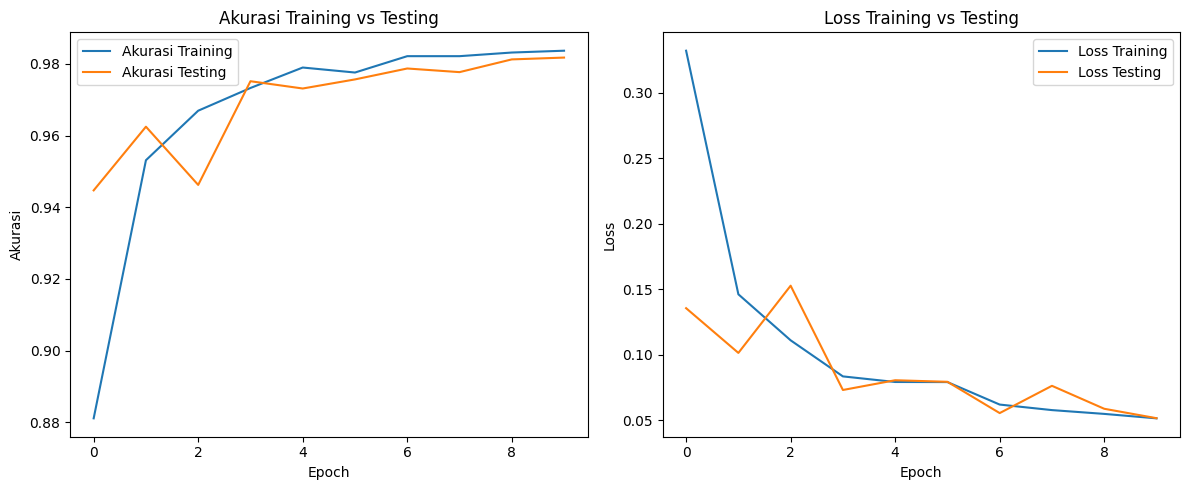

In [22]:
# Plot akurasi pelatihan dan validasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Testing')
plt.title('Akurasi Training vs Testing')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Testing')
plt.title('Loss Training vs Testing')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 898ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 772ms/step - accuracy: 0.9904 - loss: 0.0318

Akurasi Pengujian (Testing): 0.9870
Akurasi Akhir Training     : 0.9837
Akurasi Akhir Validasi     : 0.9817


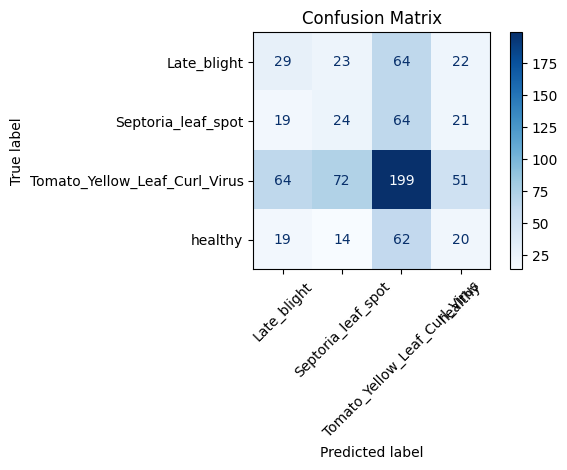

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Mendapatkan prediksi untuk test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Label asli
y_true = test_generator.classes

# Evaluasi model pada data testing
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nAkurasi Pengujian (Testing): {test_acc:.4f}")

# Ambil akurasi terakhir dari training dan validasi
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Tampilkan akurasi training, validasi, dan testing
print(f"Akurasi Akhir Training     : {final_train_acc:.4f}")
print(f"Akurasi Akhir Validasi     : {final_val_acc:.4f}")

# Hitung Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Mendapatkan label kelas
class_labels = list(test_generator.class_indices.keys())

# Tampilkan Confusion Matrix dalam bentuk grafik
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## Menyimpan Model

In [24]:
model.save("model.h5")

In [25]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-04-20 19:32:59.449540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745177579.871892   40739 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745177579.986784   40739 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [26]:
save_path = os.path.join("saved_model")
tf.saved_model.save(model, save_path)

In [27]:
# Buat folder untuk menyimpan model dan label jika belum ada
folder_path = "./tflite_model"
os.makedirs(folder_path, exist_ok=True)

# Load model .h5
model_TFLITE = tf.keras.models.load_model('model.h5')

# Konversi ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_TFLITE)
tflite_model = converter.convert()

# Simpan model .tflite ke folder
tflite_path = os.path.join(folder_path, "converted_model.tflite")
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

# Buat label file
label_content = """Late_blight
Septoria_leaf_spot
Tomato_Yellow_Leaf_Curl_Virus
healthy"""

label_path = os.path.join(folder_path, "klasifikasiGambar.txt")
with open(label_path, "w") as file:
    file.write(label_content)

print(f"Model TFLite dan label berhasil disimpan di: {folder_path}")

Saved artifact at '/tmp/tmp6ali891k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137343326403856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326402320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326402704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326402128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326403664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326399824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326399248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326398864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326399056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137343326403088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1373433263977

In [28]:
!pip freeze > requirements.txt

## Inference

Model expects input shape: [  1 150 150   3]

Silakan upload gambar daun tomat...


Saving 000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG to 000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG

Memproses: 000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG


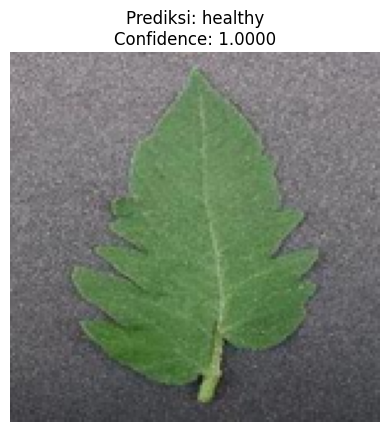

Ketik 'lanjut' untuk upload lagi, atau apa pun untuk selesai: lanjut

Silakan upload gambar daun tomat...


Saving 0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG to 0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG

Memproses: 0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG


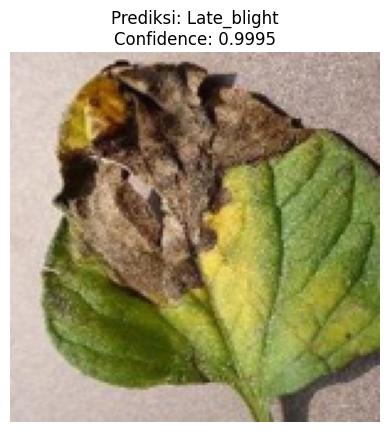

Ketik 'lanjut' untuk upload lagi, atau apa pun untuk selesai: lanjut

Silakan upload gambar daun tomat...


Saving 0a95b5b7-7bfb-4201-9320-dae33498081a___JR_Sept.L.S 2482.JPG to 0a95b5b7-7bfb-4201-9320-dae33498081a___JR_Sept.L.S 2482.JPG

Memproses: 0a95b5b7-7bfb-4201-9320-dae33498081a___JR_Sept.L.S 2482.JPG


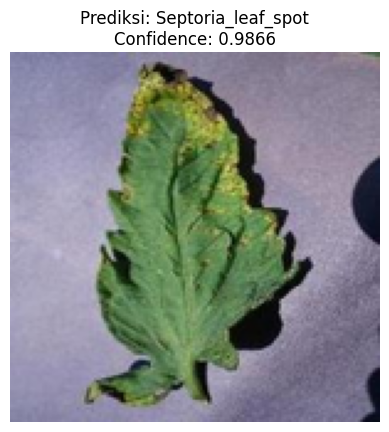

Ketik 'lanjut' untuk upload lagi, atau apa pun untuk selesai: lanjut

Silakan upload gambar daun tomat...


Saving 00b814ee-cfa9-489a-bed3-c1f927bef05a___YLCV_NREC 0220.JPG to 00b814ee-cfa9-489a-bed3-c1f927bef05a___YLCV_NREC 0220.JPG

Memproses: 00b814ee-cfa9-489a-bed3-c1f927bef05a___YLCV_NREC 0220.JPG


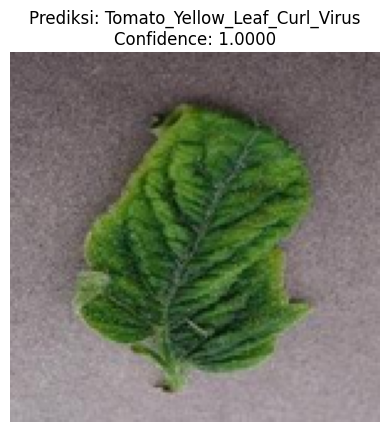

Ketik 'lanjut' untuk upload lagi, atau apa pun untuk selesai: selesai
Inference selesai.


In [29]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import os

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="./tflite_model/converted_model.tflite")
interpreter.allocate_tensors()

# Dapatkan info input/output dari model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Model expects input shape:", input_details[0]['shape'])

# Load label
with open("./tflite_model/klasifikasiGambar.txt", "r") as file:
    class_labels = [line.strip() for line in file.readlines()]

# Fungsi untuk preprocessing
def preprocess_image(image_path, target_size=(150, 150)):
    image = Image.open(image_path).convert('RGB')
    image = image.resize(target_size)
    image_array = np.array(image, dtype=np.float32) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array, image

# Fungsi prediksi
def predict_image(image_path):
    input_data, original_img = preprocess_image(image_path)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_index = np.argmax(output_data)
    predicted_label = class_labels[predicted_index]
    confidence = float(np.max(output_data))

    plt.imshow(original_img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label}\nConfidence: {confidence:.4f}", fontsize=12)
    plt.show()

# Loop untuk upload dan prediksi multiple gambar
while True:
    print("\nSilakan upload gambar daun tomat...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\nMemproses: {filename}")
        predict_image(filename)

    lanjut = input("Ketik 'lanjut' untuk upload lagi, atau apa pun untuk selesai: ").lower()
    if lanjut != 'lanjut':
        print("Inference selesai.")
        break
